In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 17s 2us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

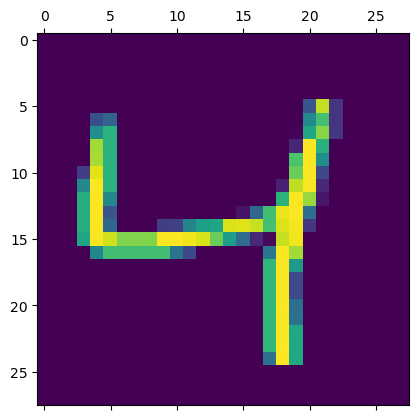

In [8]:
plt.matshow(X_train[2])

In [9]:
y_train[2]

4

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [15]:
X_train_flattened.shape

(60000, 784)

In [16]:
X_test_flattened.shape

(10000, 784)

## Very simple neural network with no hidden layer

![Screenshot from 2024-04-16 12-02-42.png](<attachment:Screenshot from 2024-04-16 12-02-42.png>)
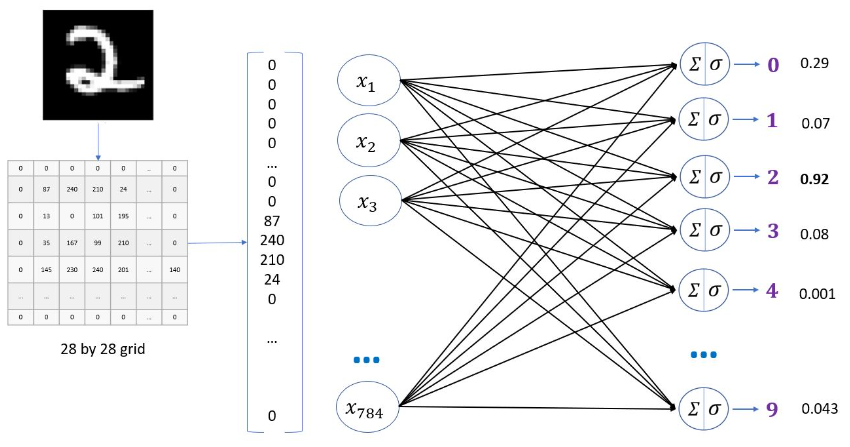

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4681 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3034 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2834 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2664 - accuracy: 0.9258


In [18]:
model.evaluate(X_test_flattened, y_test) 

313/313 [==============================] - 1s 2ms/step - loss: 0.2672 - accuracy: 0.9248


[0.2672180235385895, 0.9247999787330627]

In [19]:
model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


array([[2.09947396e-02, 3.43487358e-07, 5.24212383e-02, ...,
        9.99723554e-01, 9.84885842e-02, 6.71399891e-01],
       [3.82229924e-01, 5.59149124e-03, 9.99376476e-01, ...,
        7.49558185e-13, 2.39359394e-01, 2.82503843e-09],
       [3.19266313e-04, 9.92207110e-01, 6.11941159e-01, ...,
        1.00366749e-01, 3.41461688e-01, 3.97920720e-02],
       ...,
       [2.80721019e-06, 3.66187192e-06, 9.16721066e-04, ...,
        1.90599561e-01, 5.55892110e-01, 8.17008793e-01],
       [1.31979294e-04, 1.56993585e-04, 2.67439493e-04, ...,
        3.96238538e-05, 6.46365643e-01, 1.14501934e-04],
       [5.15620736e-03, 4.25171953e-10, 2.36699760e-01, ...,
        1.45440557e-08, 3.47963418e-04, 1.16907006e-06]], dtype=float32)

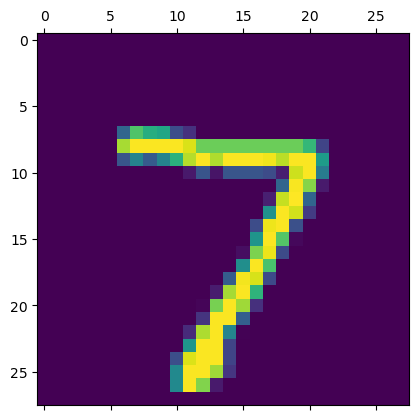

In [20]:
plt.matshow(X_test[0])

In [21]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([2.0994740e-02, 3.4348736e-07, 5.2421238e-02, 9.5371568e-01,
       1.7988143e-03, 9.7853258e-02, 1.0292282e-06, 9.9972355e-01,
       9.8488584e-02, 6.7139989e-01], dtype=float32)

In [22]:
np.argmax(y_predicted[0])

7

In [23]:
np.argmax(y_predicted[1])

2

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [26]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    6,    5,    3,    3,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,    9,  919,   18,    6,    5,   11,   10,   46,    5],
       [   1,    0,   20,  914,    0,   28,    1,   13,   26,    7],
       [   1,    1,    7,    2,  899,    0,    8,    5,   11,   48],
       [   7,    3,    5,   32,    7,  778,    9,    7,   37,    7],
       [  10,    3,    8,    1,    7,   20,  901,    2,    6,    0],
       [   1,    6,   21,    8,    3,    0,    0,  951,    5,   33],
       [   5,    8,    5,   19,    9,   19,    7,    9,  885,    8],
       [   9,    7,    2,    8,   14,    6,    0,   22,    8,  933]])>

Text(95.72222222222221, 0.5, 'Truth')

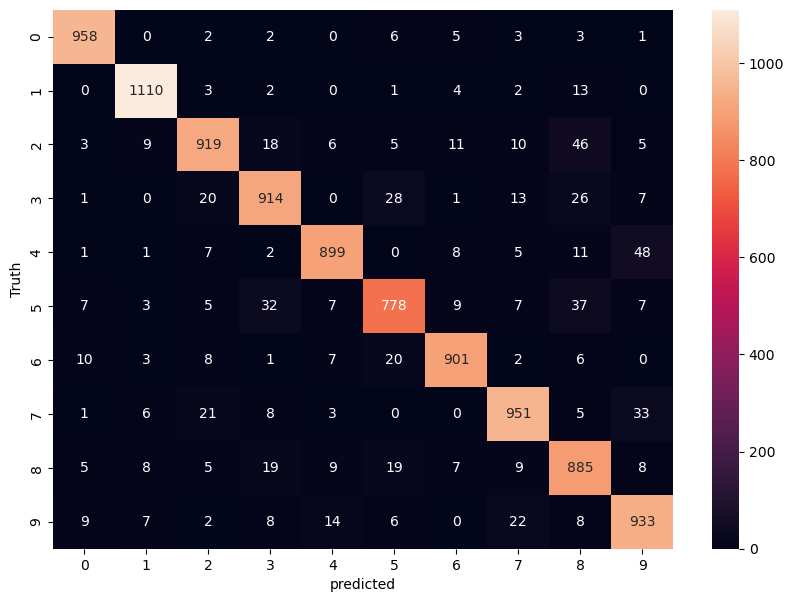

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [28]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2780 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1282 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0902 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0688 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0550 - accuracy: 0.9833


In [29]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0842 - accuracy: 0.9754


[0.08419359475374222, 0.9753999710083008]

Text(95.72222222222221, 0.5, 'Truth')

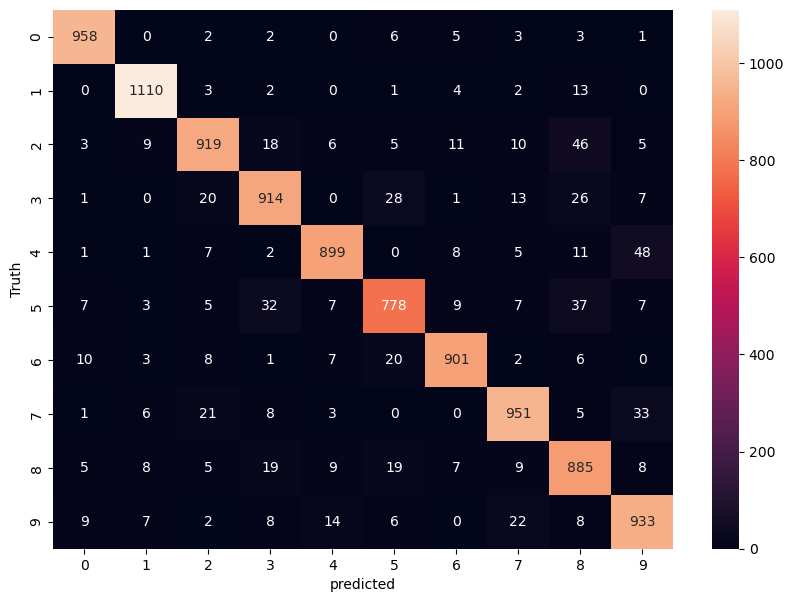

In [30]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2754 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1242 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0883 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0678 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0535 - accuracy: 0.9833
